# Student Placement prediction Using Machine Learning 

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('placement.csv')

In [107]:
# hwo the data looks like 
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [108]:
#what is the datatype of the col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [109]:
df.shape

(100, 4)

In [110]:

df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [111]:
df = df.iloc[:,1:]  #iloc[row_start:row_end,column_start:column_end]

In [112]:
df.sample(15)

,cgpa,iq,placement
86,5.1,128.0,0
31,3.9,109.0,0
12,5.4,139.0,0
9,5.1,66.0,0
17,3.3,183.0,0
15,5.1,176.0,0
62,6.0,102.0,0
52,7.0,175.0,1
64,7.0,64.0,1
49,5.4,135.0,0


In [113]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [114]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

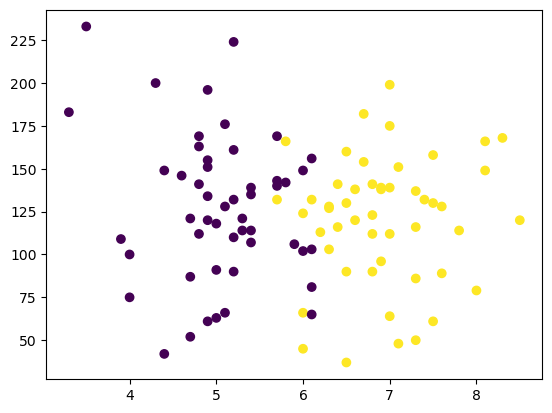

In [115]:
plt.scatter( df['cgpa'],df['iq'],c=df['placement']) 

<Axes: xlabel='cgpa', ylabel='iq'>

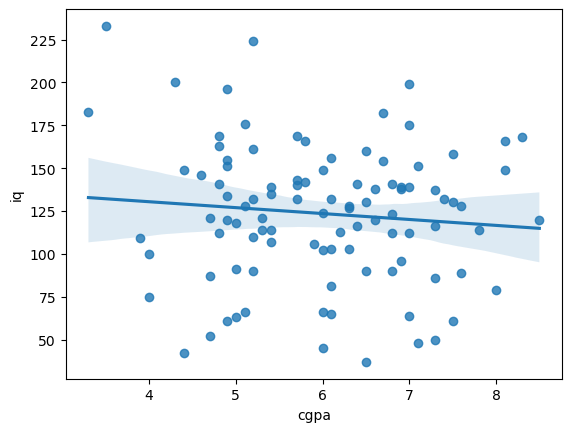

In [116]:
sns.regplot(x='cgpa',y='iq',data=df)

c:\Users\AMIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


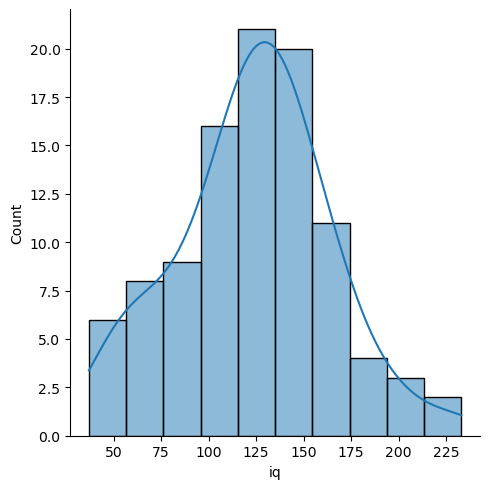

In [117]:
sns.displot(df['iq'],kde=True)

c:\Users\AMIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


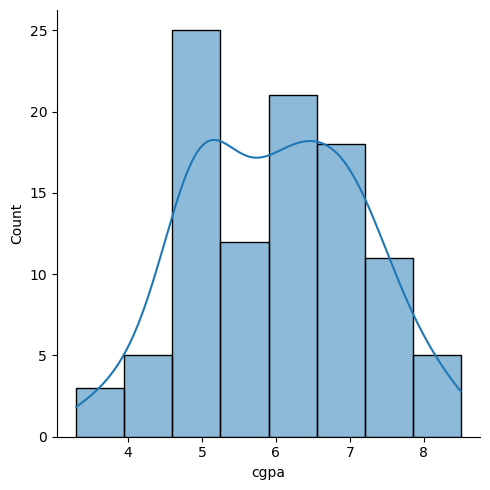

In [118]:
sns.displot(df['cgpa'],kde=True)

In [119]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [120]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [121]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [122]:
X_train

,cgpa,iq
37,8.1,149.0
34,4.8,163.0
6,5.7,143.0
75,4.8,169.0
38,6.5,160.0
...,...,...
88,4.4,149.0
35,6.8,90.0
63,6.3,128.0
73,4.9,61.0


In [123]:
y_train

37    1
34    0
6     0
75    0
38    1
     ..
88    0
35    1
63    1
73    0
8     0
Name: placement, Length: 80, dtype: int64

In [124]:
X_test

,cgpa,iq
98,6.3,103.0
25,5.0,91.0
32,7.0,139.0
71,6.1,132.0
40,4.9,134.0
77,7.3,50.0
16,5.2,224.0
10,6.0,45.0
26,7.0,199.0
61,7.3,137.0


In [125]:
y_test

98    1
25    0
32    1
71    1
40    0
77    1
16    0
10    1
26    1
61    1
55    1
18    0
49    0
29    1
78    0
69    1
17    0
92    0
0     1
67    0
Name: placement, dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

In [128]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [129]:
X_train 

array([[ 1.93420504,  0.64396164],
       [-1.06773576,  1.00242935],
       [-0.24902463,  0.49033262],
       [-1.06773576,  1.15605837],
       [ 0.47871859,  0.92561484],
       [-1.15870367, -1.83970751],
       [-0.70386415,  0.20867942],
       [ 1.38839762, -1.60926398],
       [-0.79483205,  1.33529223],
       [-0.15805673,  0.46472778],
       [ 0.29678278,  0.08065524],
       [-0.24902463,  1.15605837],
       [ 0.47871859,  0.15746975],
       [ 1.29742972,  0.20867942],
       [ 0.7516223 ,  0.43912295],
       [ 0.11484698, -1.50684463],
       [-0.24902463,  0.41351811],
       [-0.97676786, -0.09857862],
       [-1.06773576,  0.43912295],
       [-1.88644689, -0.38023182],
       [-0.70386415,  0.95121968],
       [ 0.02387907, -0.55946568],
       [ 0.6606544 ,  0.77198582],
       [ 0.02387907, -1.4812398 ],
       [-1.52257528,  1.94980831],
       [-0.88579996, -1.55805431],
       [ 1.02452601, -1.94212686],
       [ 0.93355811, -1.53244947],
       [-0.79483205,

In [130]:
X_test

array([[ 0.29678278, -0.53386084],
       [-0.88579996, -0.84111888],
       [ 0.93355811,  0.38791327],
       [ 0.11484698,  0.20867942],
       [-0.97676786,  0.25988909],
       [ 1.20646181, -1.89091718],
       [-0.70386415,  2.56432439],
       [ 0.02387907, -2.01894137],
       [ 0.93355811,  1.92420347],
       [ 1.20646181,  0.3367036 ],
       [ 1.66130133, -0.25220764],
       [-1.79547899, -0.61067535],
       [-0.52192834,  0.28549393],
       [ 0.93355811, -0.30341731],
       [ 0.11484698, -1.09716725],
       [ 2.29807665, -0.09857862],
       [-2.43225431,  1.51452609],
       [-0.70386415, -0.35462699],
       [ 0.7516223 , -0.02176411],
       [-0.88579996, -0.14978829]])

import the models 

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



Model training

In [132]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm= SVC()
svm.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Prediction on test Data 

In [133]:
y_pridict1 = lr.predict(X_test)
y_pridict2 = svm.predict(X_test)
y_pridict3 = knn.predict(X_test)
y_pridict4 = dt.predict(X_test)
y_pridict5 = rf.predict(X_test)

Evaluationg the Algorithm

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
score1 = accuracy_score(y_test,y_pridict1)
score2 = accuracy_score(y_test,y_pridict2)
score3 = accuracy_score(y_test,y_pridict3)
score4 = accuracy_score(y_test,y_pridict4)
score5 = accuracy_score(y_test,y_pridict5)

In [136]:
print(score1,score2,score3,score4,score5)

0.9 0.95 0.95 0.95 0.95


In [137]:
new_data = pd.DataFrame({'Models':['LR','svc','KNN','dT','rf'],
'acc_score':[score1*100,score2*100,score3*100,score4*100,score5*100]})

In [138]:
new_data

,Models,acc_score
0,LR,90.0
1,svc,95.0
2,KNN,95.0
3,dT,95.0
4,rf,95.0


<Axes: xlabel='Models', ylabel='acc_score'>

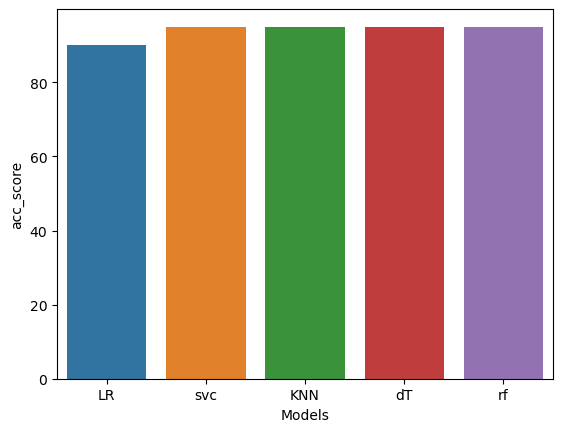

In [139]:
sns.barplot(x = new_data['Models'],y = new_data['acc_score'])

In [140]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

Get model prediction

In [141]:
y_pred = dt.predict(X_test)

In [142]:
y_pred.shape

(20,)

In [143]:
from sklearn.metrics import accuracy_score,r2_score, mean_squared_error,mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.05
0.05


In [144]:
accuracy_score(y_test,y_pred)

0.95

In [145]:
score = r2_score(y_test,y_pred)
print(score)

0.797979797979798


Get Future Prediction 
steps to follow
1. Extract a random row using sample function
2. Separate X and Y 
3. Standardize x
4. predict

In [146]:
x_new = df.sample(1)
x_new

,cgpa,iq,placement
71,6.1,132.0,1


In [147]:
x_new.shape

(1, 3)

In [148]:
x_new = x_new.drop(['placement'],axis = 1)


In [149]:
x_new

,cgpa,iq
71,6.1,132.0


In [150]:
x_new = scaler.fit_transform(x_new)

In [151]:
y_pred_new = dt.predict(x_new)

In [152]:
y_pred_new

array([1], dtype=int64)

In [153]:
if (y_pred_new == 1):
    print('Placement ho  gya')
else:
    print("placement nai hua")

Placement ho  gya


In [154]:
import joblib
joblib.dump(lr,"palcement_model.pkl")


['palcement_model.pkl']

In [155]:
model = joblib.load("palcement_model.pkl")

In [156]:
import tkinter as tk
from tkinter import font
from sklearn.linear_model import LogisticRegression
import numpy as np


# Function to predict placement
def predict_placement():
    try:
        cgpa = float(cgpa_entry.get())
        iq = float(iq_entry.get())
        features = np.array([[cgpa, iq]])
        prediction = model.predict(features)
        if prediction[0] == 1:
            result_label.config(text="Congratulations! You will be placed.")
        else:
            result_label.config(text="Sorry, you will not be placed.")
    except ValueError:
        result_label.config(text="Invalid input. Please enter numeric values.")

# Create main window
root = tk.Tk()
root.title("Student Placement Predictor")

# Set font
custom_font = font.Font(family="Helvetica", size=12)

# Create labels
cgpa_label = tk.Label(root, text="CGPA:", font=custom_font)
cgpa_label.grid(row=0, column=0, padx=10, pady=5, sticky="e")
iq_label = tk.Label(root, text="IQ:", font=custom_font)
iq_label.grid(row=1, column=0, padx=10, pady=5, sticky="e")

# Create entry fields
cgpa_entry = tk.Entry(root, font=custom_font)
cgpa_entry.grid(row=0, column=1, padx=10, pady=5)
iq_entry = tk.Entry(root, font=custom_font)
iq_entry.grid(row=1, column=1, padx=10, pady=5)

# Create predict button
predict_button = tk.Button(root, text="Predict", command=predict_placement, font=custom_font)
predict_button.grid(row=2, column=0, columnspan=2, pady=10)

# Create result label
result_label = tk.Label(root, text="", font=custom_font)
result_label.grid(row=3, column=0, columnspan=2)

# Run the main event loop
root.mainloop()
